In [5]:
pip install citipy


  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py) ... done
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675969 sha256=abf9110cc2a64f86129b56e0999ec9b108a367ef337959234bc216952e4ae99e
  Stored in directory: /Users/edrinngadze/Library/Caches/pip/wheels/4b/b5/88/49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city, including the metric units parameter
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | polyarnyy
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | kone
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | taperoa
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | stung treng
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | las khorey
Processing Record 18 of Set 1 | fisterra
Processing Record 19 of Set 1 | weisendorf
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | el haouaria
Processing Record 22 of Set 1 | grytviken
Processing R

In [24]:
# Convert the city_data list of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,-3.22,83,100,2.57,US,1705411224
1,polyarnyy,69.1989,33.4478,-14.46,94,100,4.43,RU,1705411162
2,kavieng,-2.5744,150.7967,28.18,79,100,3.74,PG,1705411227
3,vilyuchinsk,52.9306,158.4028,-7.85,92,93,4.02,RU,1705411228
4,port elizabeth,-33.9180,25.5701,25.61,67,20,6.17,ZA,1705411187


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,-3.22,83,100,2.57,US,1705411224
1,polyarnyy,69.1989,33.4478,-14.46,94,100,4.43,RU,1705411162
2,kavieng,-2.5744,150.7967,28.18,79,100,3.74,PG,1705411227
3,vilyuchinsk,52.9306,158.4028,-7.85,92,93,4.02,RU,1705411228
4,port elizabeth,-33.9180,25.5701,25.61,67,20,6.17,ZA,1705411187


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

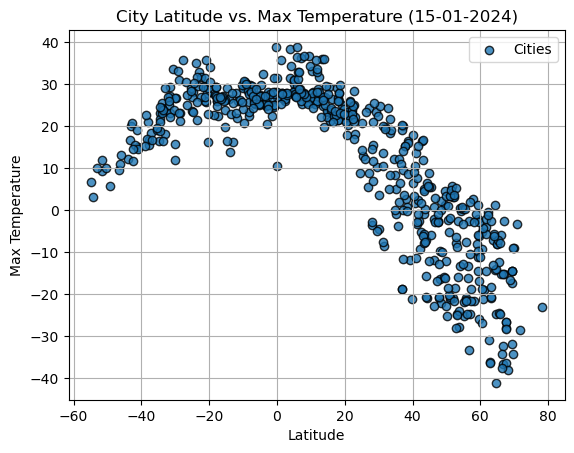

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (15-01-2024)') 
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

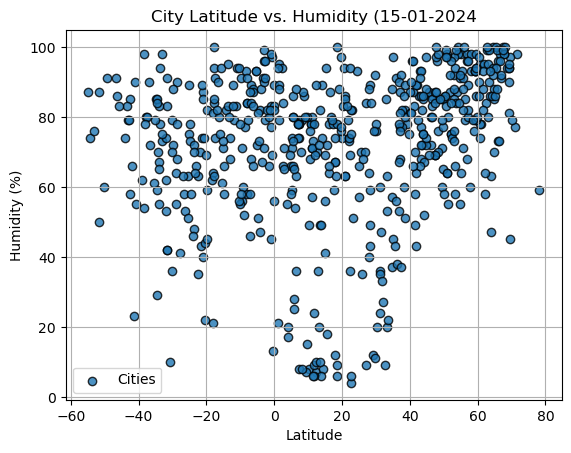

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (15-01-2024') 
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

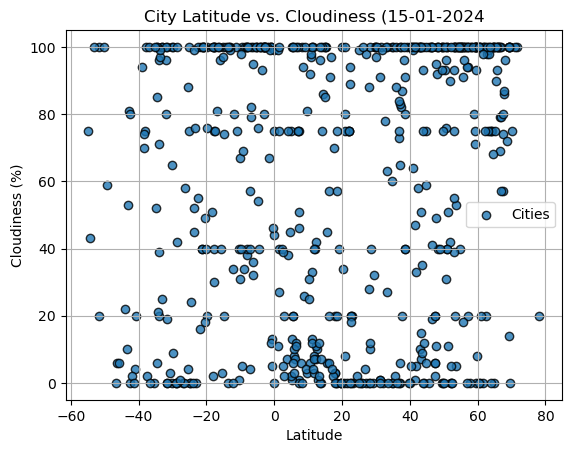

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (15-01-2024') 
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

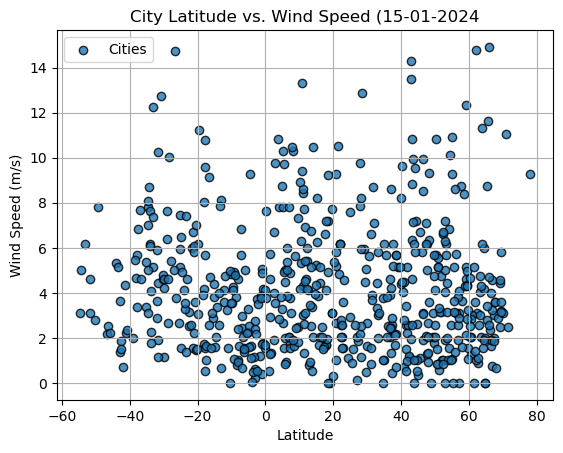

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (15-01-2024') 
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
from scipy.stats import linregress

def plot_linear_regression(x, y, title, x_label, y_label, text_coordinates):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x (array-like): Data for the x-axis.
    y (array-like): Data for the y-axis.
    title (str): Title of the plot.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    text_coordinates (tuple): Coordinates for the regression line equation.
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Calculate regression values
    regress_values = x * slope + intercept

    # Line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot and regression line
    plt.scatter(x, y, edgecolor='black')
    plt.plot(x, regress_values, "r-")

    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=12, color='red')

    # Add titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print the r-value
    print(f'The r-value is: {rvalue}')

    # Show plot
    plt.show()


The r-value is: -0.8831235450443282


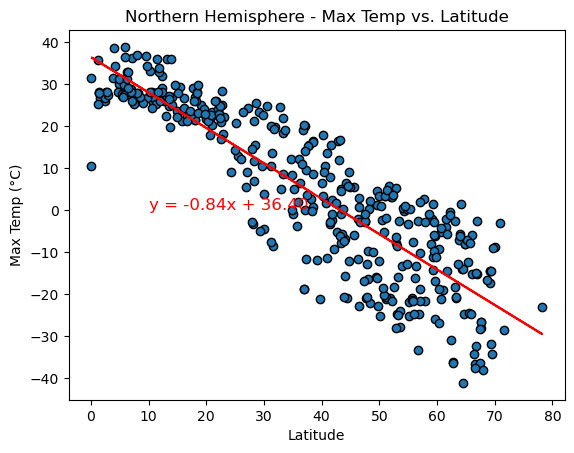

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,-3.22,83,100,2.57,US,1705411224
1,polyarnyy,69.1989,33.4478,-14.46,94,100,4.43,RU,1705411162
3,vilyuchinsk,52.9306,158.4028,-7.85,92,93,4.02,RU,1705411228
9,utrik,11.2278,169.8474,26.12,71,100,8.45,MH,1705411237
10,stung treng,13.5259,105.9683,24.88,49,96,2.54,KH,1705411239


In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Variables for plotting (for example, Max Temperature vs. Latitude)
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']  # Replace 'Max Temp' as needed

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Max Temp vs. Latitude', 'Latitude', 'Max Temp (°C)', (10, 0))

# Display the first few rows of the Northern Hemisphere DataFrame
northern_hemisphere_df.head()


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter the main DataFrame to include only Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kavieng,-2.5744,150.7967,28.18,79,100,3.74,PG,1705411227
4,port elizabeth,-33.9180,25.5701,25.61,67,20,6.17,ZA,1705411187
5,waitangi,-43.9535,-176.5597,12.12,74,22,5.34,NZ,1705411231
6,kone,-21.0595,164.8658,25.71,87,100,2.23,NC,1705411233
7,adamstown,-25.0660,-130.1015,23.53,75,100,7.45,PN,1705411234


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8831235450443282


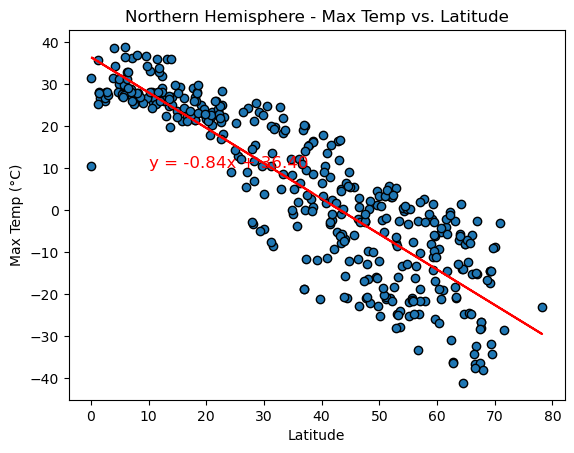

In [49]:
# Filtering the DataFrame for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Variables for plotting ( Max Temperature vs. Latitude)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']  

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Max Temp vs. Latitude', 'Latitude', 'Max Temp (°C)', (10, 10))


The r-value is: 0.6182001642686045


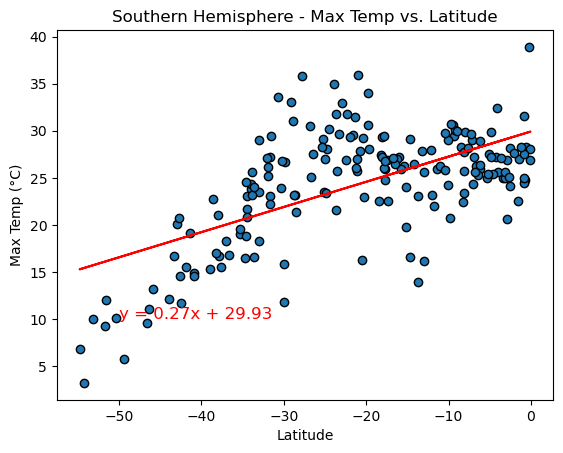

In [50]:
# Filtering the DataFrame for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Variables for plotting ( Max Temperature vs. Latitude)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp'] 

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Max Temp vs. Latitude', 'Latitude', 'Max Temp (°C)', (-50, 10))


**Discussion about the linear relationship:**

In the Northern Hemisphere, latitude has a strong inversed linear relationship with max temperatures. As latitude increases, we can expect temperatures to decrease.

In the Southern Hemisphere, there's a reasonably strong positive relationship between latitude and maximum temperature. As latitude increases, you can expect the maximum temperature to generally be higher.the r-value at 0.6182 suggest a moderately strong positive linear relatiship between these two variables.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44875200650868713


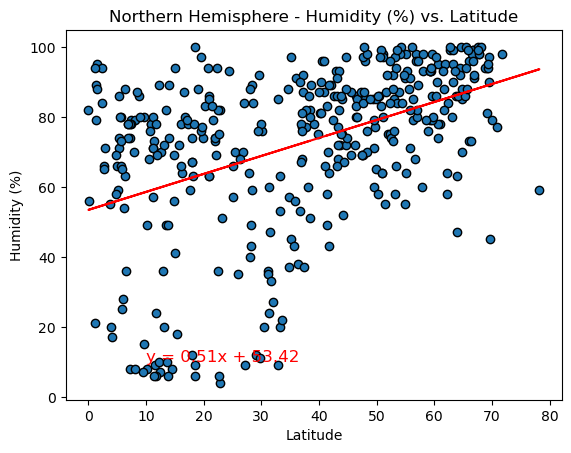

In [51]:
# Northern Hemisphere
# Filtering the DataFrame for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Variables for plotting (Humidity vs. Latitude)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity'] 

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Humidity (%) vs. Latitude', 'Latitude', 'Humidity (%)', (10, 10))


The r-value is: 0.11776868007713558


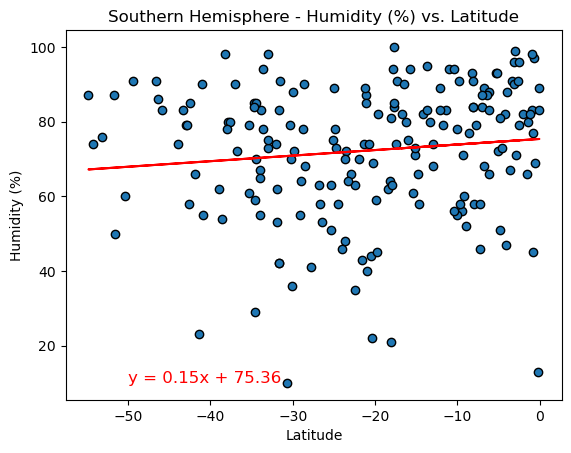

In [52]:
# Southern Hemisphere
# Filtering the DataFrame for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Variables for plotting (Humidity vs. Latitude)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity'] 

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Humidity (%) vs. Latitude', 'Latitude', 'Humidity (%)', (-50, 10))


**Discussion about the linear relationship:** 

Based on the calculated r-values, the linear correlation between latitude and humidity appears to be moderate in the Northern Hemisphere and very weak in the Southern Hemisphere. While there is some degree of correlation in the Northern Hemisphere (r-value = 0.44875), suggesting a slight tendency for humidity to vary with latitude, the correlation is much less pronounced in the Southern Hemisphere (r-value = 0.117768), indicating that other factors might play a more significant role in determining humidity levels in these regions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3239540981190959


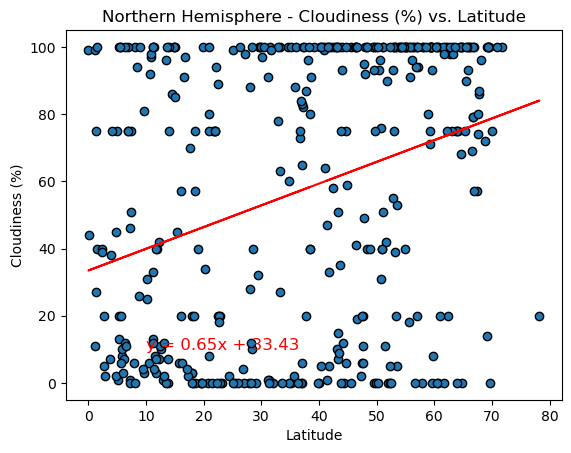

In [53]:
# Northern Hemisphere
# Filtering the DataFrame for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Variables for plotting (Cloudiness vs. Latitude)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']  

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Cloudiness (%) vs. Latitude', 'Latitude', 'Cloudiness (%)', (10, 10))


The r-value is: 0.23971805242420552


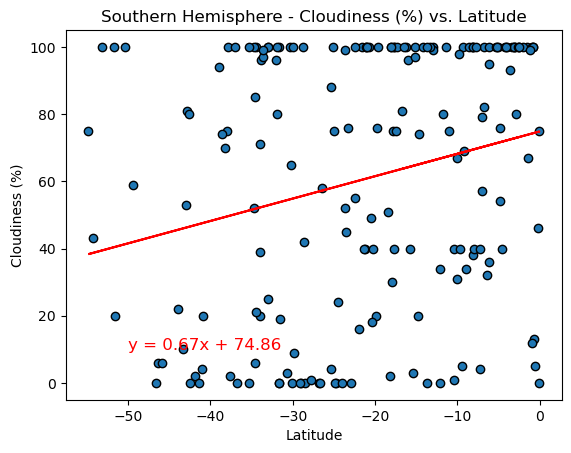

In [54]:
# Southern Hemisphere
# Filtering the DataFrame for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Variables for plotting (Cloudiness vs. Latitude)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']  # Ensure 'Cloudiness' matches your column name for cloudiness

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Cloudiness (%) vs. Latitude', 'Latitude', 'Cloudiness (%)', (-50, 10))


**Discussion about the linear relationship:** 
The r-values obtained from the linear regression analysis of Cloudiness vs. Latitude in both hemispheres indicate a weak correlation between these variables. In the Northern Hemisphere, the r-value is 0.324, suggesting a low to moderate level of correlation. This implies that while there can be some relationship between latitude and cloudiness, it is not particularly strong, and other factors likely have a more significant impact on cloudiness levels. In the Southern Hemisphere, the correlation is even weaker, with an r-value of 0.24, indicating that latitude is a relatively minor factor in determining cloudiness. This suggests that, across both hemispheres, cloudiness is influenced by a variety of factors, with latitude being only one of them and is by no means most decisive.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07661122686707673


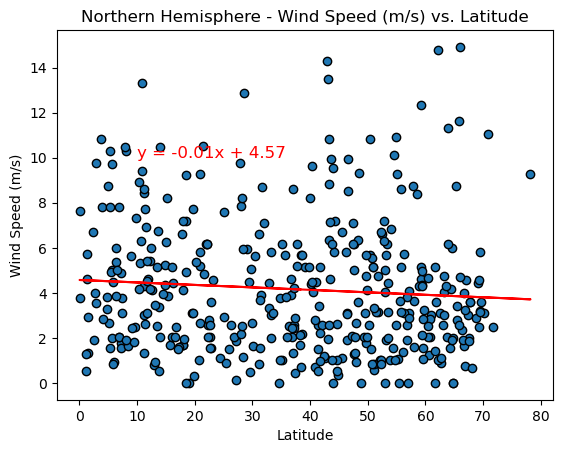

In [55]:
# Northern Hemisphere
# Filtering the DataFrame for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Variables for plotting (Wind Speed vs. Latitude)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']  

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Wind Speed (m/s) vs. Latitude', 'Latitude', 'Wind Speed (m/s)', (10, 10))


The r-value is: -0.27170058209928666


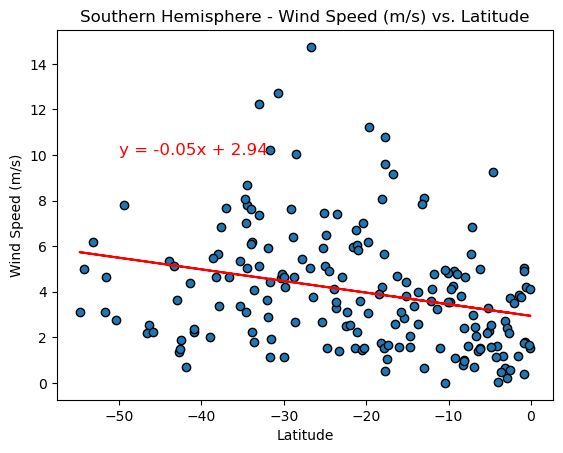

In [56]:
# Southern Hemisphere
# Filtering the DataFrame for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Variables for plotting (Wind Speed vs. Latitude)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed'] 

# Call the function with the appropriate parameters
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Wind Speed (m/s) vs. Latitude', 'Latitude', 'Wind Speed (m/s)', (-50, 10))


**Discussion about the linear relationship:** 

The r-values obtained from the linear regression analysis of Wind Speed vs. Latitude indicate a very weak correlation in both the Northern and Southern Hemispheres, albeit in different magnitudes. In the Northern Hemisphere, the r-value is approximately -0.0766, suggesting an extremely weak, almost negligible negative correlation. This implies that latitude has very little to no influence on wind speed in the Northern Hemisphere. In the Southern Hemisphere, the correlation is somewhat stronger but still weak, with an r-value of about -0.2717, indicating a slight negative correlation. This suggests that while there is some relationship between latitude and wind speed in the Southern Hemisphere, it is not a dominant factor, and other variables likely play a more significant role in determining wind speeds. Overall, these results suggest that latitude is not a major determinant of wind speed in either hemisphere.